## Workflow of hernan-lab-to-nwb package
The purpose of this package is to read various sources and types of data and to wrangle them to the NWB format, specifically after you have collected data and before you have processed data!!! (SEE PICTURE)

Additional changes to NWB would require specific user requirements. For example, if you were to segment your calcium imaging data into ROIs, you could add ROI masks to the NWB file, but this code won't do that. 

This should be run after collecting data!

Requirements:
1. Anaconda3
2. VScode or Spyder (code written in VScode, would recommend)

Installation:
1. conda create -n decode_lab_env python=3.9
2. conda activate decode_lab_env
3. git clone https://github.com/JohnStout/hernan-lab-to-nwb 
4. cd hernan-lab-to-nwb
5. pip install - e.

<img src="/Users/js0403/hernan-lab-to-nwb/tests/idealized workflow.png" />

----
# Neuralynx
Below can be changed as needed to create your nwb files

In [1]:
import numpy as np
import pandas as pd
from hernan_lab_to_nwb.readers import ioreaders
from hernan_lab_to_nwb.utils import nwb_utils

In [2]:
# Define folder path
folder_path = r'X:\01.Experiments\R21\21-12\Sessions\DA testing\2021-11-22_11-48-20' # folder path

# Read data
ephys_object = ioreaders.read_nlx(folder_path) # we first instantiate the object
ephys_object.read_ephys(opts = 'CSC') # read data

OS windows detected
Cite Neo https://github.com/NeuralEnsemble/python-neo/blob/master/CITATION.txt
Working with CSC
Working with TT


In [3]:
for i in range(len(ephys_object.csc_grouping_table['TetrodeGroup'])):
    # fill out tetrode group
    ephys_object.csc_grouping_table['TetrodeGroup'][i] = i+1
    # fill out brainregion
    if 'HPC' in ephys_object.csc_grouping_table['Name'][i]:
        ephys_object.csc_grouping_table['BrainRegion'][i] = 'HPC'
    elif 'PFC' in ephys_object.csc_grouping_table['Name'][i]:
        ephys_object.csc_grouping_table['BrainRegion'][i] = 'PFC'
        

ephys_object.csc_grouping_table

C:\Users\uggriffin\AppData\Local\Temp\ipykernel_8176\234915404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ephys_object.csc_grouping_table['TetrodeGroup'][i] = i+1
C:\Users\uggriffin\AppData\Local\Temp\ipykernel_8176\234915404.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ephys_object.csc_grouping_table['BrainRegion'][i] = 'HPC'
C:\Users\uggriffin\AppData\Local\Temp\ipykernel_8176\234915404.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,Name,TetrodeGroup,BrainRegion,Inclusion
0,HPC_black.ncs,1,HPC,True
1,HPC_blue.ncs,2,HPC,True
2,HPC_green.ncs,3,HPC,True
3,HPC_red.ncs,4,HPC,True
4,PFC_blue.ncs,5,PFC,True
5,PFC_red.ncs,6,PFC,True


## Shouldn't have to change this

In [5]:
df = pd.DataFrame()
df['experiment_description']=['Trigger trials based on PFC-HPC coherence']
df['experimenter name(s)']=[['John Stout', 'Allison George', 'Suhyeong Kim', 'Henry Hallock', 'Amy Griffin']]
df['institution']=['University of Delaware']
df['lab_name']=['Griffin Lab']
df['subject_age']=['>PD90']
df['subject_description']=['Rat']
df['subject_species/genotype']=['Long Evans Rat']
df['recording_device_name']=['Digitalynx SX']
df['recording_device_description']=['Cheetah Software']
df['recording_device_manufacturer']=['Neuralynx']

# Change this based on rat and session

In [6]:
df['session_description']=['Testing Session #1']
df['session_notes']=['NA']
df['session_id']=['Session1']
df['subject_id']=['21-12']
df['subject_sex']=['F']

# Write NWB file

In [7]:
ephys_object.write_nwb(metadata=df)

Failed to create electrode group. You may only have one channel per group.
This make take a few moments if working with a lot of CSC data...
Units not added to NWB file
Save .nwb file to:  X:\01.Experiments\R21\21-12\Sessions\DA testing\2021-11-22_11-48-20\nwbfile.nwb
Validating X:\01.Experiments\R21\21-12\Sessions\DA testing\2021-11-22_11-48-20\nwbfile.nwb against cached namespace information using namespace 'core'.
NWB validation may be incorrect. Still need an invalid NWB file to check against....10/10/2023
No errors detected in NWB file


#### PROOF OF CONVERSION: Pynapple is lovely for loading the NWB file

nwbfile
┍━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│ Keys             │ Type        │
┝━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ epochs           │ IntervalSet │
│ ElectricalSeries │ TsdFrame    │
┕━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━┙
LFP data:
Time (s)              HPC_black     HPC_blue    HPC_green    HPC_red    PFC_blue  ...
------------------  -----------  -----------  -----------  ---------  ----------  -----
1637581781.687523      890.991   1075.56            -0       394.043    668.518   ...
1637581781.6880229     871.399   1081.6             -0       417.48     666.87    ...
1637581781.6885228     849.243   1088.2             -0       446.777    664.49    ...
1637581781.6890228     819.763   1094.42            -0       480.652    667.969   ...
1637581781.689523      786.987   1100.46            -0       517.639    683.716   ...
...
1637583587.9628658     -26.7334    -2.56348      -1970.76   -517.273    -85.8765  ...
1637583587.963366      -28.3813    -0.915527     -2013.43   -522.583    -76.90

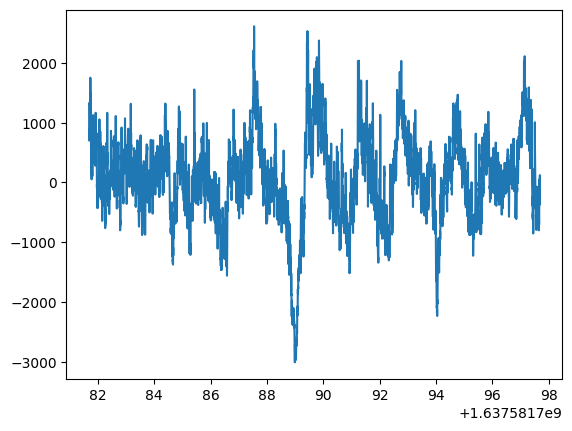

In [9]:
import pynapple as nap
import matplotlib.pyplot as plt
import os

# load file and print output
data = nap.load_file(os.path.join(folder_path,'nwbfile.nwb'))
print(data)

# print example of LFP data
print("LFP data:")
print(data['ElectricalSeries'])

# plot signal
plt.plot(data['ElectricalSeries']['HPC_black'][0:32000])

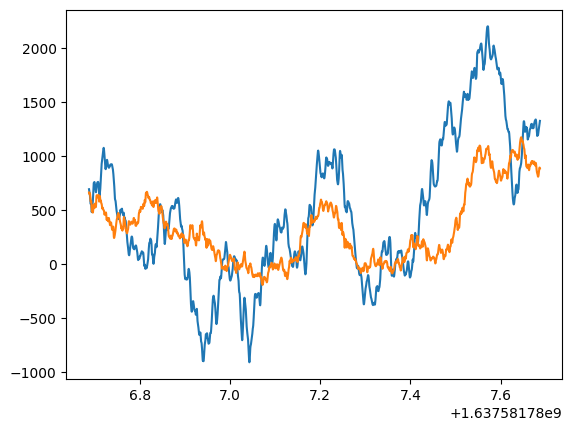

In [14]:
plt.plot(data['ElectricalSeries']['HPC_red'][10000:12000])
plt.plot(data['ElectricalSeries']['PFC_red'][10000:12000])